## Analyse Exploratoire De Données - Incidence Maladie Côte d'Ivoire de 2012 à 2015

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Chargement du fichier CSV dans un DataFrame
file_path = 'incidence-de-maladies-sur-la-population-de-2012-a-2015.csv'
data = pd.read_csv(file_path)

In [3]:
# Aperçu des premières lignes du DataFrame
df = data.copy()
df.head()

,ANNEE,REGIONS / DISTRICTS,VILLES / COMMUNES,MALADIE,INCIDENCE SUR LA POPULATION GENERALE (%)
0,2012,ABIDJAN 2,NaN,PALUDISME,130.546716
1,2012,NaN,ABOBO EST,PALUDISME,171.825230
2,2012,NaN,ABOBO OUEST,PALUDISME,68.224065
3,2012,NaN,ANYAMA,PALUDISME,192.061067
4,2012,NaN,COCODY-BINGERVILLE,PALUDISME,163.085138


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ANNEE                                     2040 non-null   int64  
 1   REGIONS / DISTRICTS                       396 non-null    object 
 2   VILLES / COMMUNES                         1644 non-null   object 
 3   MALADIE                                   2040 non-null   object 
 4   INCIDENCE SUR LA POPULATION GENERALE (%)  2040 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 79.8+ KB


In [5]:
df.isna().sum()

ANNEE                                          0
REGIONS / DISTRICTS                         1644
VILLES / COMMUNES                            396
MALADIE                                        0
INCIDENCE SUR LA POPULATION GENERALE (%)       0
dtype: int64

In [6]:
# Remplir les valeurs manquantes
df['REGIONS / DISTRICTS'].fillna(method='ffill', inplace=True)

C:\Users\goliy\AppData\Local\Temp\ipykernel_6480\2056222.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['REGIONS / DISTRICTS'].fillna(method='ffill', inplace=True)


In [7]:
df.tail()

,ANNEE,REGIONS / DISTRICTS,VILLES / COMMUNES,MALADIE,INCIDENCE SUR LA POPULATION GENERALE (%)
2035,2015,TONKPI,MAN,MALNUTRITION (0 - 4 ANS),29.723320
2036,2015,TONKPI,ZOUAN HOUNIEN,MALNUTRITION (0 - 4 ANS),31.805375
2037,2015,WORODOUGOU-BERE,NaN,MALNUTRITION (0 - 4 ANS),7.445266
2038,2015,WORODOUGOU-BERE,MANKONO,MALNUTRITION (0 - 4 ANS),8.105991
2039,2015,WORODOUGOU-BERE,SEGUELA,MALNUTRITION (0 - 4 ANS),6.477996


In [8]:
df.isna().sum()

ANNEE                                         0
REGIONS / DISTRICTS                           0
VILLES / COMMUNES                           396
MALADIE                                       0
INCIDENCE SUR LA POPULATION GENERALE (%)      0
dtype: int64

In [9]:
df.shape

(2040, 5)

In [10]:
# Grouper par région et année, puis calculer la somme des incidences
agrégation_incidence = df.groupby(['ANNEE', 'REGIONS / DISTRICTS'])['INCIDENCE SUR LA POPULATION GENERALE (%)'].sum()

agrégation_incidence

ANNEE  REGIONS / DISTRICTS   
2012   ABIDJAN 1-GRANDS PONTS    1231.742905
       ABIDJAN 2                 1204.659444
       AGNEBY-TIASSA-ME          1056.247217
       BELIER                    1012.042264
       BOUNKANI-GONTOUGO         1011.539159
                                    ...     
2015   N'ZI-IFOU                 1818.080665
       PORO-TCHOLOGO-BAGOUE      1096.326970
       SUD-COMOE                  883.193001
       TONKPI                    1325.779876
       WORODOUGOU-BERE            573.603372
Name: INCIDENCE SUR LA POPULATION GENERALE (%), Length: 80, dtype: float64

In [11]:
# Extraire les lignes où 'VILLES / COMMUNES' est NaN
incidence_region = df[df['VILLES / COMMUNES'].isna()]

# Afficher pour comparaison
incidence_region[['ANNEE', 'REGIONS / DISTRICTS', 'INCIDENCE SUR LA POPULATION GENERALE (%)']]

,ANNEE,REGIONS / DISTRICTS,INCIDENCE SUR LA POPULATION GENERALE (%)
0,2012,ABIDJAN 2,130.546716
7,2012,ABIDJAN 1-GRANDS PONTS,109.962634
14,2012,AGNEBY-TIASSA-ME,114.872116
21,2012,BELIER,151.461085
26,2012,BOUNKANI-GONTOUGO,114.757955
...,...,...,...
2015,2015,N'ZI-IFOU,5.395923
2022,2015,PORO-TCHOLOGO-BAGOUE,29.504304
2028,2015,SUD-COMOE,7.632415
2032,2015,TONKPI,21.624628


In [12]:
df = df.dropna()

In [13]:
df.head(20)

,ANNEE,REGIONS / DISTRICTS,VILLES / COMMUNES,MALADIE,INCIDENCE SUR LA POPULATION GENERALE (%)
1,2012,ABIDJAN 2,ABOBO EST,PALUDISME,171.825230
2,2012,ABIDJAN 2,ABOBO OUEST,PALUDISME,68.224065
3,2012,ABIDJAN 2,ANYAMA,PALUDISME,192.061067
4,2012,ABIDJAN 2,COCODY-BINGERVILLE,PALUDISME,163.085138
5,2012,ABIDJAN 2,KOUMASSI-PORT-BOUET-VRIDI,PALUDISME,128.410586
6,2012,ABIDJAN 2,MARCORY-TREICHVILLE,PALUDISME,87.704106
8,2012,ABIDJAN 1-GRANDS PONTS,ADJAME-PLATEAU-ATTECOUBE,PALUDISME,68.612836
9,2012,ABIDJAN 1-GRANDS PONTS,DABOU,PALUDISME,145.737654
10,2012,ABIDJAN 1-GRANDS PONTS,GRAND LAHOU,PALUDISME,134.386530
11,2012,ABIDJAN 1-GRANDS PONTS,JACQUEVILLE,PALUDISME,227.415072


In [14]:
df.shape

(1644, 5)

In [15]:
df.to_csv("incidence_maladie.csv", index=False)

In [16]:
df_copy = df.copy()
df_copy.head(20)

,ANNEE,REGIONS / DISTRICTS,VILLES / COMMUNES,MALADIE,INCIDENCE SUR LA POPULATION GENERALE (%)
1,2012,ABIDJAN 2,ABOBO EST,PALUDISME,171.825230
2,2012,ABIDJAN 2,ABOBO OUEST,PALUDISME,68.224065
3,2012,ABIDJAN 2,ANYAMA,PALUDISME,192.061067
4,2012,ABIDJAN 2,COCODY-BINGERVILLE,PALUDISME,163.085138
5,2012,ABIDJAN 2,KOUMASSI-PORT-BOUET-VRIDI,PALUDISME,128.410586
6,2012,ABIDJAN 2,MARCORY-TREICHVILLE,PALUDISME,87.704106
8,2012,ABIDJAN 1-GRANDS PONTS,ADJAME-PLATEAU-ATTECOUBE,PALUDISME,68.612836
9,2012,ABIDJAN 1-GRANDS PONTS,DABOU,PALUDISME,145.737654
10,2012,ABIDJAN 1-GRANDS PONTS,GRAND LAHOU,PALUDISME,134.386530
11,2012,ABIDJAN 1-GRANDS PONTS,JACQUEVILLE,PALUDISME,227.415072


In [26]:
df.tail(20)

,ANNEE,REGIONS / DISTRICTS,VILLES / COMMUNES,MALADIE,INCIDENCE SUR LA POPULATION GENERALE (%)
2016,2015,N'ZI-IFOU,BOCANDA,MALNUTRITION (0 - 4 ANS),3.198453
2017,2015,N'ZI-IFOU,BONGOUANOU,MALNUTRITION (0 - 4 ANS),4.218311
2018,2015,N'ZI-IFOU,DAOUKRO,MALNUTRITION (0 - 4 ANS),7.887572
2019,2015,N'ZI-IFOU,DIMBOKRO,MALNUTRITION (0 - 4 ANS),13.331325
2020,2015,N'ZI-IFOU,M'BAHIAKRO,MALNUTRITION (0 - 4 ANS),1.159841
2021,2015,N'ZI-IFOU,PRIKRO,MALNUTRITION (0 - 4 ANS),6.723442
2023,2015,PORO-TCHOLOGO-BAGOUE,BOUNDIALI,MALNUTRITION (0 - 4 ANS),11.790622
2024,2015,PORO-TCHOLOGO-BAGOUE,FERKE,MALNUTRITION (0 - 4 ANS),21.451076
2025,2015,PORO-TCHOLOGO-BAGOUE,KORHOGO,MALNUTRITION (0 - 4 ANS),32.965652
2026,2015,PORO-TCHOLOGO-BAGOUE,OUANGOLODOUGOU,MALNUTRITION (0 - 4 ANS),49.988233


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1644 entries, 1 to 2039
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ANNEE                                     1644 non-null   int64  
 1   REGIONS / DISTRICTS                       1644 non-null   object 
 2   VILLES / COMMUNES                         1644 non-null   object 
 3   MALADIE                                   1644 non-null   object 
 4   INCIDENCE SUR LA POPULATION GENERALE (%)  1644 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 77.1+ KB


In [19]:
# Valeurs manquantes par colonne
missing_values = df.isnull().sum()
print(missing_values)


ANNEE                                       0
REGIONS / DISTRICTS                         0
VILLES / COMMUNES                           0
MALADIE                                     0
INCIDENCE SUR LA POPULATION GENERALE (%)    0
dtype: int64


In [20]:
# Noms uniques dans les colonnes clés
unique_regions = df['REGIONS / DISTRICTS'].unique()
unique_villes = df['VILLES / COMMUNES'].unique()
unique_maladies = df['MALADIE'].unique()

print("Unique Regions:", unique_regions)
print('--------------------------------------------------------------------------------------------')
print("Unique Villes/Communes:", unique_villes,end="\n")
print('--------------------------------------------------------------------------------------------')
print("Unique Maladies:", unique_maladies)


Unique Regions: ['ABIDJAN 2' 'ABIDJAN 1-GRANDS PONTS' 'AGNEBY-TIASSA-ME' 'BELIER'
 'BOUNKANI-GONTOUGO' 'CAVALLY-GUEMON' 'GBEKE' 'GBOKLE-NAWA-SAN-PEDRO'
 'GÔH' 'HAMBOL' 'HAUT SASSANDRA' 'INDENIE DUABLIN'
 'KABADOUGOU-BAFING-FOLON' 'LÔH-DJIBOUA' 'MARAHOUE' "N'ZI-IFOU"
 'PORO-TCHOLOGO-BAGOUE' 'SUD-COMOE' 'TONKPI' 'WORODOUGOU-BERE']
--------------------------------------------------------------------------------------------
Unique Villes/Communes: ['ABOBO EST' 'ABOBO OUEST' 'ANYAMA' 'COCODY-BINGERVILLE'
 'KOUMASSI-PORT-BOUET-VRIDI' 'MARCORY-TREICHVILLE'
 'ADJAME-PLATEAU-ATTECOUBE' 'DABOU' 'GRAND LAHOU' 'JACQUEVILLE'
 'YOPOUGON EST' 'YOPOUGON OUEST' 'ADZOPE' 'AGBOVILLE' 'AKOUPE' 'ALEPE'
 'SIKENSI' 'TIASSALE' 'DIDIEVI' 'TIEBISSOU' 'TOUMODI' 'YAMOUSSOUKRO'
 'BONDOUKOU' 'BOUNA' 'NASSIAN' 'TANDA' 'BANGOLO' 'BLOLEQUIN' 'DUEKOUE'
 'GUIGLO' 'KOUIBLY' 'TOULEPLEU' 'BEOUMI' 'BOUAKÉ NORD- EST'
 'BOUAKÉ NORD- OUEST' 'BOUAKÉ SUD' 'SAKASSOU' 'GUEYO' 'SAN-PEDRO'
 'SASSANDRA' 'SOUBRE' 'TABOU' 'GAGNOA' 'OUM

## Analyse temporelle (par année)

In [27]:
# Incidence moyenne par année et maladie
df_agg_annee_maladie = df.groupby(['ANNEE', 'MALADIE'])['INCIDENCE SUR LA POPULATION GENERALE (%)'].mean().reset_index()
df_agg_annee_maladie

,ANNEE,MALADIE,INCIDENCE SUR LA POPULATION GENERALE (%)
0,2012,BILHARZIOZE URINAIRE,0.221051
1,2012,CONJONCTIVITE,3.706575
2,2012,DIARRHEE,19.710672
3,2012,MALNUTRITION (0 - 4 ANS),16.933395
4,2012,PALUDISME,128.675417
5,2013,BILHARZIOZE URINAIRE,0.198655
6,2013,CONJONCTIVITE,2.083849
7,2013,DIARRHEE,18.298975
8,2013,MALNUTRITION (0 - 4 ANS),11.277349
9,2013,PALUDISME,128.186769


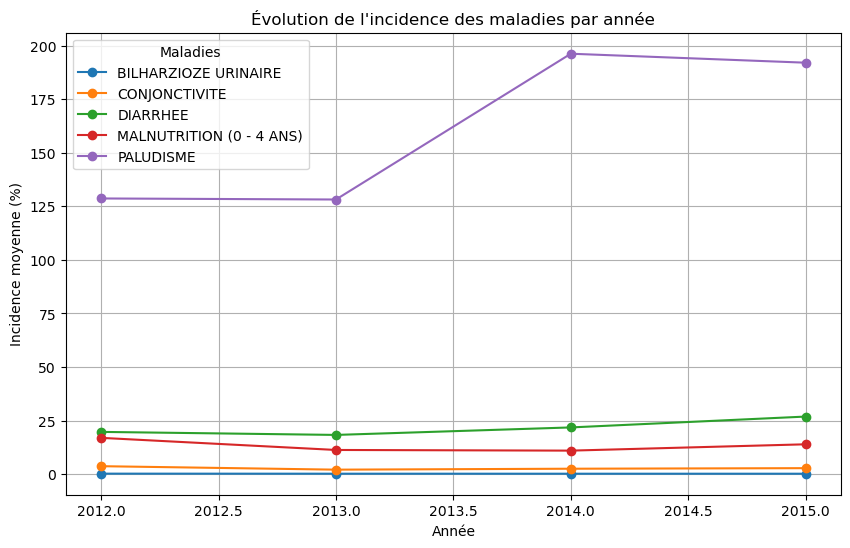

In [28]:
plt.figure(figsize=(10, 6))

for maladie in df_agg_annee_maladie['MALADIE'].unique():
    subset = df_agg_annee_maladie[df_agg_annee_maladie['MALADIE'] == maladie]
    plt.plot(subset['ANNEE'], subset['INCIDENCE SUR LA POPULATION GENERALE (%)'], marker='o', label=maladie)

plt.xlabel('Année')
plt.ylabel('Incidence moyenne (%)')
plt.title('Évolution de l\'incidence des maladies par année')
plt.legend(title='Maladies')
plt.grid(True)

plt.show()

## Observation :

- Le **paludisme** a une incidence très élevée par rapport aux autres maladies, avec des valeurs avoisinant les 200%.
- L'incidence du paludisme semble avoir atteint un pic en 2014 avant de légèrement baisser en 2015.
- La **malnutrition** chez les enfants (0-4 ans) montre une légère augmentation sur la période observée, mais reste toujours à un niveau bien plus faible que celui du paludisme, avec une incidence inférieure à 25%.
- La **diarrhée**, **conjonctivite**, **bilharziose urinaire**, ces trois maladies ont une incidence bien plus faible, toujours en dessous des 25% tout au long de la période étudiée.
- L’évolution est presque constante avec une légère augmentation au fil des années, mais sans changements majeurs.

## Conclusion :
- Le **paludisme** reste de loin la maladie ayant la plus forte incidence dans les régions observées.
- Les autres maladies, comme la **malnutrition** ou la **diarrhée**, bien qu'importantes, ne sont pas alarmant.
-  Faire un traitement particulier sur le paludisme pourrait avoir un plus grand impact sur la santé dans les zones concernées.

## Analyse régionale et géographique

In [45]:
# Incidence moyenne par région
df_agg_region = df.groupby(['REGIONS / DISTRICTS', 'MALADIE'])['INCIDENCE SUR LA POPULATION GENERALE (%)'].mean().reset_index()

df_agg_region

,REGIONS / DISTRICTS,MALADIE,INCIDENCE SUR LA POPULATION GENERALE (%)
0,ABIDJAN 1-GRANDS PONTS,BILHARZIOZE URINAIRE,0.072036
1,ABIDJAN 1-GRANDS PONTS,CONJONCTIVITE,4.248822
2,ABIDJAN 1-GRANDS PONTS,DIARRHEE,24.851563
3,ABIDJAN 1-GRANDS PONTS,MALNUTRITION (0 - 4 ANS),9.177888
4,ABIDJAN 1-GRANDS PONTS,PALUDISME,139.578784
...,...,...,...
94,WORODOUGOU-BERE,BILHARZIOZE URINAIRE,0.035298
95,WORODOUGOU-BERE,CONJONCTIVITE,1.949092
96,WORODOUGOU-BERE,DIARRHEE,12.592244
97,WORODOUGOU-BERE,MALNUTRITION (0 - 4 ANS),6.353690


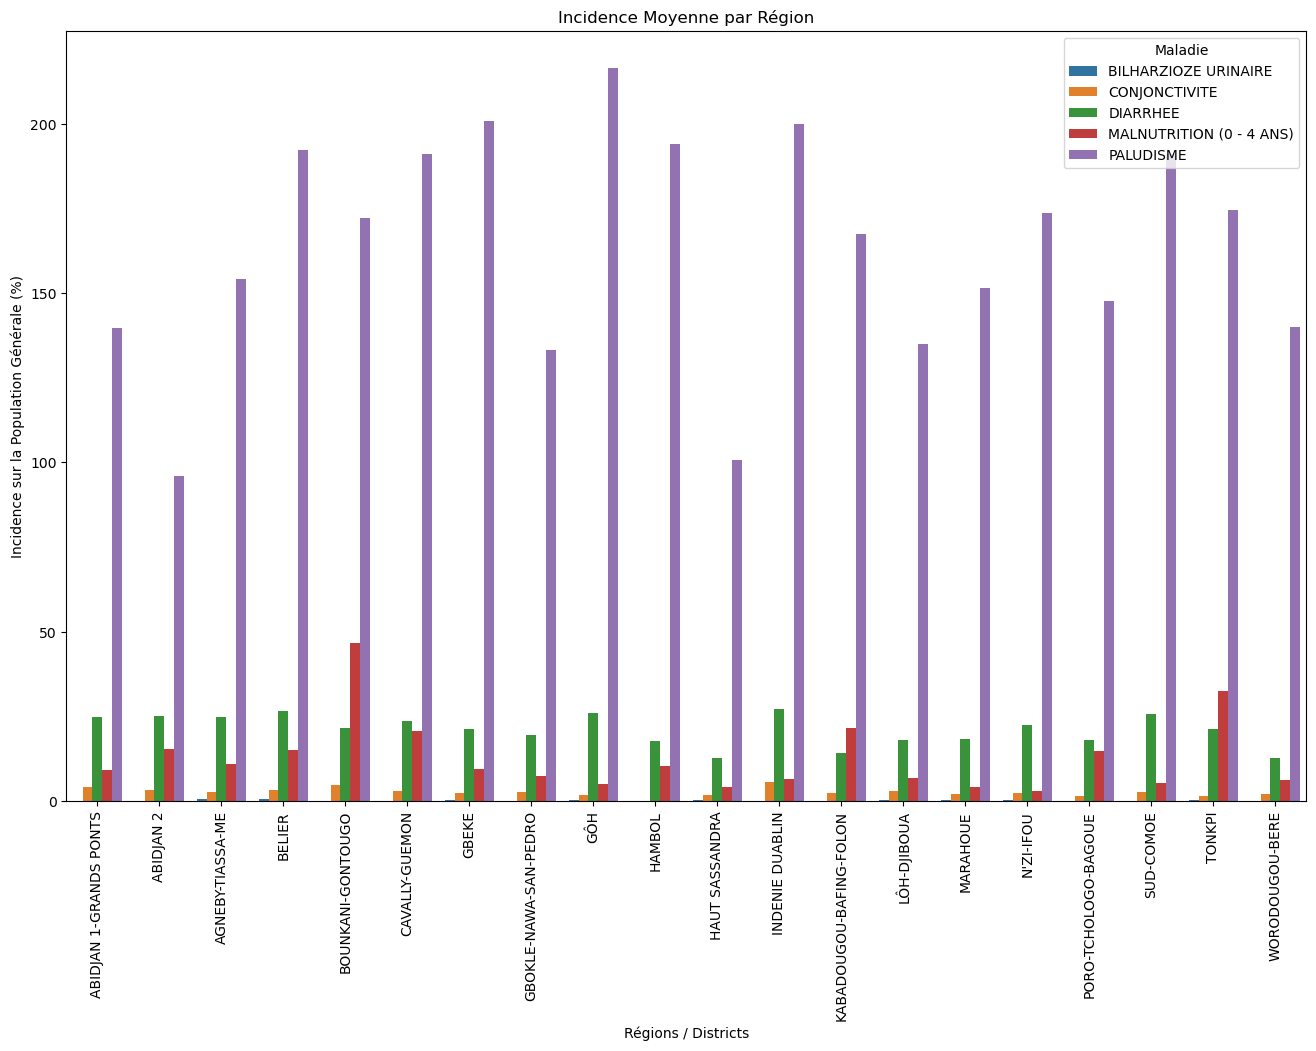

In [54]:
plt.figure(figsize=(16, 10))
sns.barplot(x='REGIONS / DISTRICTS', y='INCIDENCE SUR LA POPULATION GENERALE (%)', hue='MALADIE', data=df_agg_region)
plt.title('Incidence Moyenne par Région')
plt.xlabel('Régions / Districts')
plt.ylabel('Incidence sur la Population Générale (%)')
plt.legend(title='Maladie')

plt.xticks(rotation=90)

plt.show()


## Analyse par type de maladie

In [55]:
# Incidence moyenne par maladie
df_agg_maladie = df.groupby('MALADIE')['INCIDENCE SUR LA POPULATION GENERALE (%)'].mean().reset_index()

df_agg_maladie

,MALADIE,INCIDENCE SUR LA POPULATION GENERALE (%)
0,BILHARZIOZE URINAIRE,0.199681
1,CONJONCTIVITE,2.774252
2,DIARRHEE,21.668223
3,MALNUTRITION (0 - 4 ANS),13.275686
4,PALUDISME,161.286712


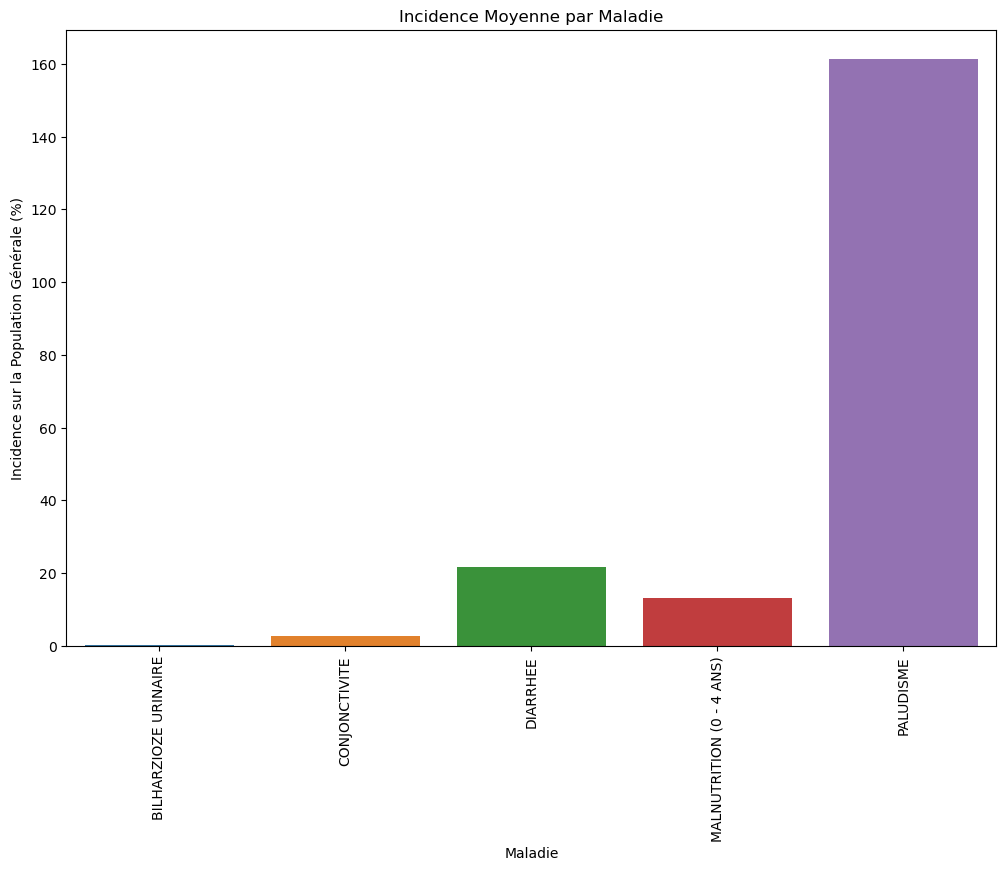

In [56]:
plt.figure(figsize=(12, 8))
sns.barplot(x='MALADIE', y='INCIDENCE SUR LA POPULATION GENERALE (%)', data=df_agg_maladie)
plt.title('Incidence Moyenne par Maladie')
plt.xlabel('Maladie')
plt.ylabel('Incidence sur la Population Générale (%)')

plt.xticks(rotation=90)

plt.show()

## Observation:

- Le **paludisme** a l’incidence la plus élevée parmi toutes les maladies, avec une valeur moyenne de **161.29%**. Cela indique que le paludisme est de loin la maladie la plus préoccupante.
- La **diarrhée** présente une incidence moyenne de **21.67%**, ce qui en fait la deuxième maladie la plus fréquente.
- La **malnutrition** chez les enfants de 0 à 4 ans a une incidence moyenne de **13.28%**. Bien que moins élevée que celle du paludisme et de la diarrhée, elle reste préoccupante. 
- La **conjonctivite** a une incidence moyenne de **2.77%**. Bien que relativement faible, elle nécessite des campagnes de sensibilisation sur l’hygiène oculaire et l’accès aux soins.
La **bilharziose urinaire** présente l’incidence la plus faible, avec une valeur moyenne de **0.20%**. Cela indique que cette maladie est moins préoccupante par rapport aux autres maladies analysées.

## Conclusion:

- Le **paludisme** est clairement la maladie la plus préoccupante en termes d'incidence, suivie par la **diarrhée** et la **malnutrition**.
- **Conjonctivite** et **bilharziose urinaire**, bien qu'ayant des incidences plus faibles, restent quand même des préoccupations.

## Analyse par population cible

In [68]:
# Où la malnutrition chez les enfants de 0 à 4 ans est-elle la plus préoccupante ?
df_malnutrition = df[df['MALADIE'] == 'MALNUTRITION (0 - 4 ANS)']
df_agg_region = df_malnutrition.groupby('REGIONS / DISTRICTS')['INCIDENCE SUR LA POPULATION GENERALE (%)'].mean().reset_index()

In [71]:
df_malnutrition.head(15)

,ANNEE,REGIONS / DISTRICTS,VILLES / COMMUNES,MALADIE,INCIDENCE SUR LA POPULATION GENERALE (%)
1633,2012,ABIDJAN 2,ABOBO EST,MALNUTRITION (0 - 4 ANS),12.590949
1634,2012,ABIDJAN 2,ABOBO OUEST,MALNUTRITION (0 - 4 ANS),9.577226
1635,2012,ABIDJAN 2,ANYAMA,MALNUTRITION (0 - 4 ANS),26.811434
1636,2012,ABIDJAN 2,COCODY-BINGERVILLE,MALNUTRITION (0 - 4 ANS),6.247959
1637,2012,ABIDJAN 2,KOUMASSI-PORT-BOUET-VRIDI,MALNUTRITION (0 - 4 ANS),5.855837
1638,2012,ABIDJAN 2,MARCORY-TREICHVILLE,MALNUTRITION (0 - 4 ANS),3.214254
1640,2012,ABIDJAN 1-GRANDS PONTS,ADJAME-PLATEAU-ATTECOUBE,MALNUTRITION (0 - 4 ANS),7.762434
1641,2012,ABIDJAN 1-GRANDS PONTS,DABOU,MALNUTRITION (0 - 4 ANS),40.556309
1642,2012,ABIDJAN 1-GRANDS PONTS,GRAND LAHOU,MALNUTRITION (0 - 4 ANS),0.764292
1643,2012,ABIDJAN 1-GRANDS PONTS,JACQUEVILLE,MALNUTRITION (0 - 4 ANS),0.413976


In [72]:
df_agg_region

,REGIONS / DISTRICTS,INCIDENCE SUR LA POPULATION GENERALE (%)
0,ABIDJAN 1-GRANDS PONTS,9.177888
1,ABIDJAN 2,15.286585
2,AGNEBY-TIASSA-ME,10.995153
3,BELIER,15.081533
4,BOUNKANI-GONTOUGO,46.616953
5,CAVALLY-GUEMON,20.680267
6,GBEKE,9.433417
7,GBOKLE-NAWA-SAN-PEDRO,7.316893
8,GÔH,5.087365
9,HAMBOL,10.449504


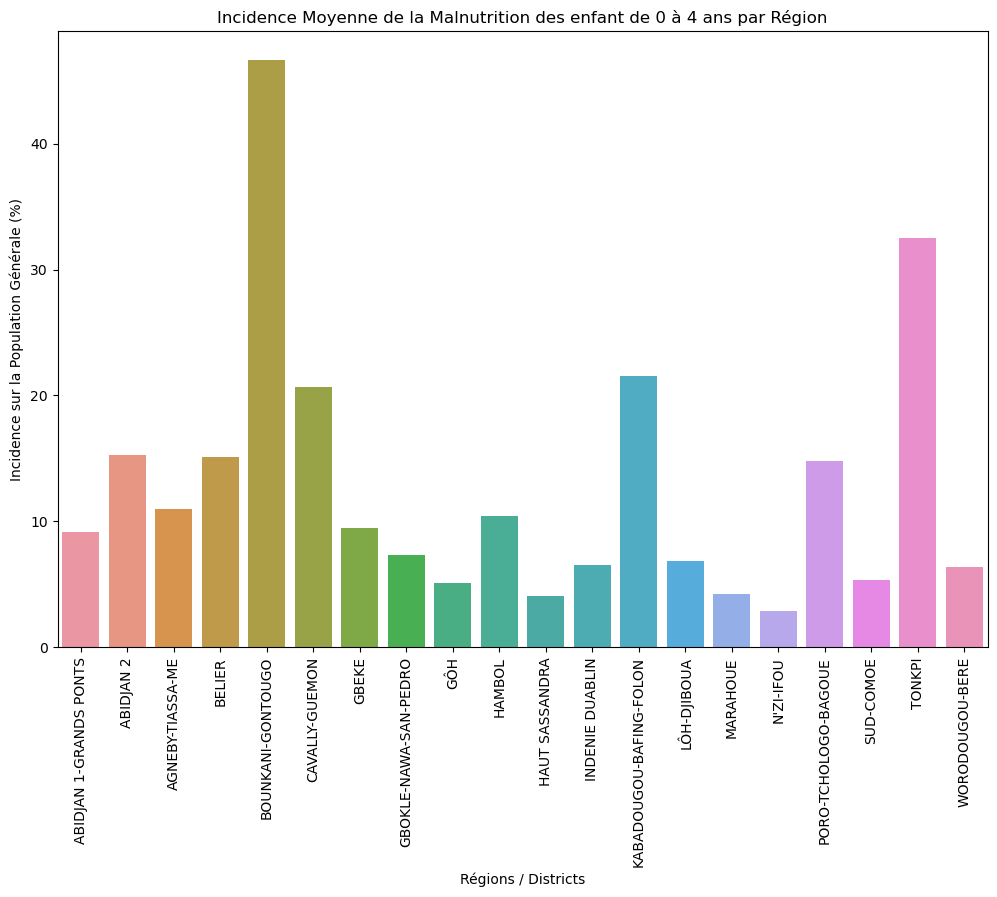

In [73]:
plt.figure(figsize=(12, 8))
sns.barplot(x='REGIONS / DISTRICTS', y='INCIDENCE SUR LA POPULATION GENERALE (%)', data=df_agg_region)
plt.title('Incidence Moyenne de la Malnutrition des enfant de 0 à 4 ans par Région')
plt.xlabel('Régions / Districts')
plt.ylabel('Incidence sur la Population Générale (%)')

plt.xticks(rotation=90)

plt.show()

In [77]:
df_malnutrition['REGIONS / DISTRICTS'].unique()

array(['ABIDJAN 2', 'ABIDJAN 1-GRANDS PONTS', 'AGNEBY-TIASSA-ME',
       'BELIER', 'BOUNKANI-GONTOUGO', 'CAVALLY-GUEMON', 'GBEKE',
       'GBOKLE-NAWA-SAN-PEDRO', 'GÔH', 'HAMBOL', 'HAUT SASSANDRA',
       'INDENIE DUABLIN', 'KABADOUGOU-BAFING-FOLON', 'LÔH-DJIBOUA',
       'MARAHOUE', "N'ZI-IFOU", 'PORO-TCHOLOGO-BAGOUE', 'SUD-COMOE',
       'TONKPI', 'WORODOUGOU-BERE'], dtype=object)

## Observation:

- La malnutrition chez les enfants de 0 à 4 ans a un taux très élevé dans les région **Bounkani-Gontougo** et **Tonpki** ayant respectivement en moyenne environ **47%** et **33%** de taux d'incidence.
- **Cavally-Guemon** et **Kabadougou-Bafing-Folon** montre une incidence moyenne de **20%**.
-  La région **N’Zi-Ifou** présente une incidence moyenne de 5%. Cela indique que la malnutrition est moins élevée dans cette région par rapport aux autres.

## Conclusion:
La malnutrition chez les enfants de 0 à 4 ans est donc plus préoccupante dans la région de **Bounkani-Gontougo**, suivie de **Tonpki** et moins préoccupante dans la région **N'zi-Ifou**.

## Evolution de la prévalence entre 2012 et 2015

In [78]:
# Incidence moyenne par année et par région
df_agg = df.groupby(['ANNEE', 'REGIONS / DISTRICTS'])['INCIDENCE SUR LA POPULATION GENERALE (%)'].mean().reset_index()

In [79]:
df_agg

,ANNEE,REGIONS / DISTRICTS,INCIDENCE SUR LA POPULATION GENERALE (%)
0,2012,ABIDJAN 1-GRANDS PONTS,36.081119
1,2012,ABIDJAN 2,34.636525
2,2012,AGNEBY-TIASSA-ME,30.441223
3,2012,BELIER,41.294323
4,2012,BOUNKANI-GONTOUGO,41.967375
...,...,...,...
75,2015,N'ZI-IFOU,51.543834
76,2015,PORO-TCHOLOGO-BAGOUE,36.845497
77,2015,SUD-COMOE,44.939512
78,2015,TONKPI,52.766154


C:\Users\goliy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\goliy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\goliy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\goliy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

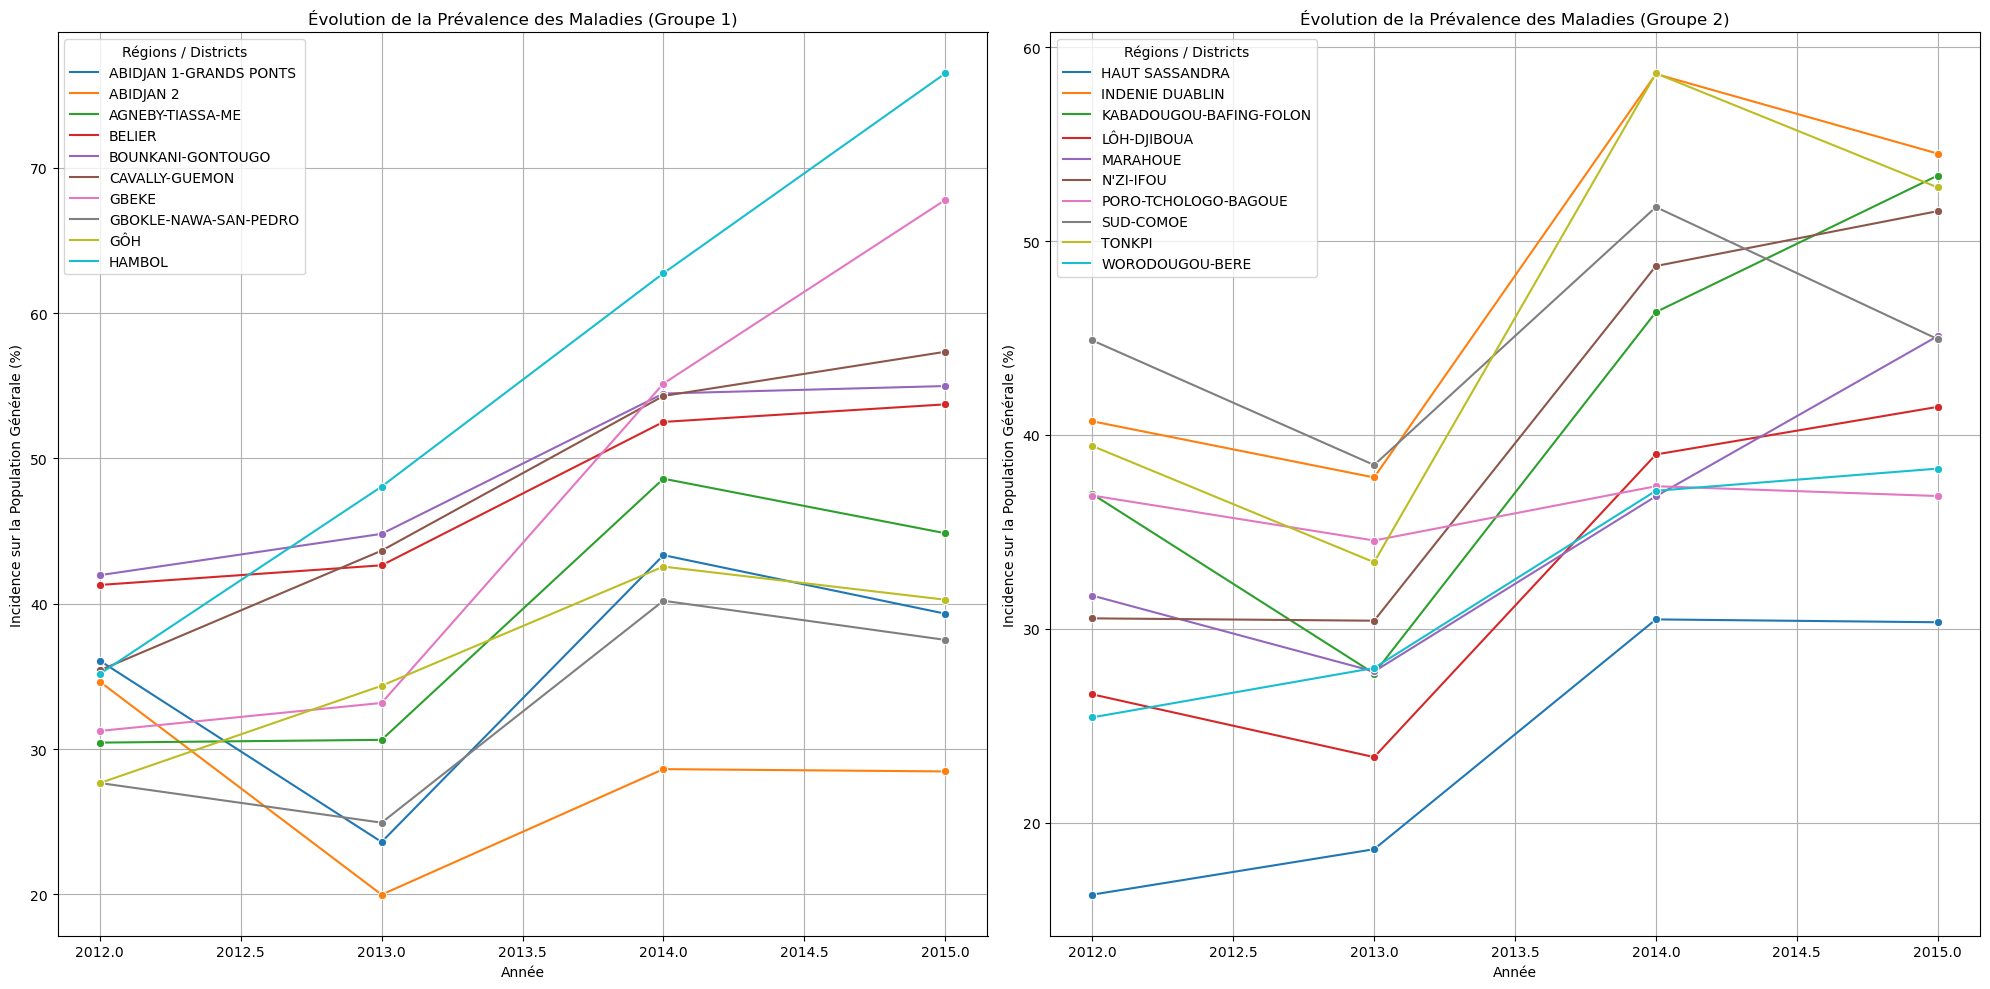

In [95]:
# Divisons les données en deux groupes et mettons-les côte à côte pour une meilleur visualisons 
regions_group1 = df_agg['REGIONS / DISTRICTS'].unique()[:len(df_agg['REGIONS / DISTRICTS'].unique())//2]
regions_group2 = df_agg['REGIONS / DISTRICTS'].unique()[len(df_agg['REGIONS / DISTRICTS'].unique())//2:]

df_group1 = df_agg[df_agg['REGIONS / DISTRICTS'].isin(regions_group1)]
df_group2 = df_agg[df_agg['REGIONS / DISTRICTS'].isin(regions_group2)]

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.lineplot(data=df_group1, x='ANNEE', y='INCIDENCE SUR LA POPULATION GENERALE (%)', hue='REGIONS / DISTRICTS', marker='o', ax=axes[0])
axes[0].set_title('Évolution de la Prévalence des Maladies (Groupe 1)')
axes[0].set_xlabel('Année')
axes[0].set_ylabel('Incidence sur la Population Générale (%)')
axes[0].legend(title='Régions / Districts')
axes[0].grid(True)

sns.lineplot(data=df_group2, x='ANNEE', y='INCIDENCE SUR LA POPULATION GENERALE (%)', hue='REGIONS / DISTRICTS', marker='o', ax=axes[1])
axes[1].set_title('Évolution de la Prévalence des Maladies (Groupe 2)')
axes[1].set_xlabel('Année')
axes[1].set_ylabel('Incidence sur la Population Générale (%)')
axes[1].legend(title='Régions / Districts')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Observation:
- On observe une augmentation globale des incidences des maladies sur la population générale dans la plupart des régions entre 2012 et 2015.

- La région de **Hambol** a la plus forte incidence, particulièrement après 2014, dépassant largement les autres régions. D'autres régions, comme **Gbêkê** montrent également des augmentations importantes.

- Certaines régions, comme **Abidjan 1-Grands Ponts**, **Abidjan 2**, **Poro-Tchologo-Bagoue**, **Worodogou-Bere** etc, semblent connaître une évolution plus stable ou légèrement en baisse vers 2015.

- En gros certaines régions connaissent des hausses très marquées, tandis que d'autres évoluent de manière plus modérée.

## Classement des villes/régions à risque

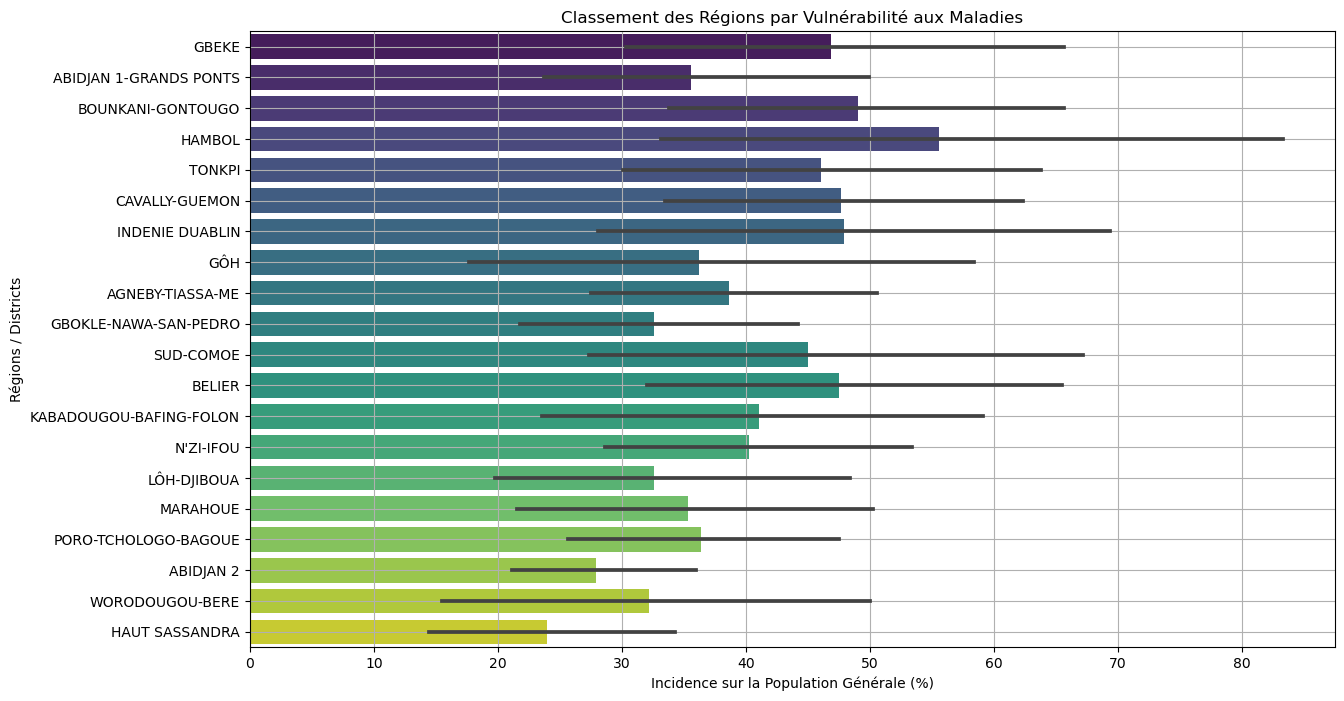

In [97]:
# Tri des données par incidence décroissante
df_sorted = df.sort_values(by='INCIDENCE SUR LA POPULATION GENERALE (%)', ascending=False)

# Visualisation des données
plt.figure(figsize=(14, 8))
sns.barplot(x='INCIDENCE SUR LA POPULATION GENERALE (%)', y='REGIONS / DISTRICTS', data=df_sorted, palette='viridis')
plt.title('Classement des Régions par Vulnérabilité aux Maladies')
plt.xlabel('Incidence sur la Population Générale (%)')
plt.ylabel('Régions / Districts')
plt.grid(True)
plt.show()


## Observation:
- **Hambol** est la région la plus **vulnérable** avec une incidence de plus de **80%**.
- On observe d'autres régions à **haut risque** comme , **Indénie Duablin (environ 69%)**, **Sud-Comoé (environ 67%)**, **Gbêkê (environ 65%)**, ** Bounkani-Gontougo (environ 65%)** et **Bélier (environ 63%)** .
- On a des régions à **risque modéré** comme **Abidjan 2 (environ 36%)**, **Haut Sassandra (environ 35%)**